## TopoStats and PySPM Preprocessing

In [52]:
import json
from pathlib import Path

#from ipywidgets import FileUpload
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

from topostats.filters import Filters
from topostats.scars import remove_scars
#from topostats.grains import Grains
#from topostats.grainstats import GrainStats
from topostats.io import find_files, read_yaml, write_yaml, LoadScans, save_array
#from topostats.logs.logs import setup_logger, LOGGER_NAME
#from topostats.plottingfuncs import Images
#from topostats.tracing.dnatracing import trace_image
#from topostats.utils import update_config

In [29]:

# Set the base directory to be current working directory of the Notebook
BASE_DIR = Path().cwd()
print(BASE_DIR)
# Alternatively if you know where your files area comment the above line and uncomment the below adjust it for your use.
#BASE_DIR = Path("/Users/user/Documents/PhD/AFML/AFML/sample_preproc_data/jpk/")
# Adjust the file extension approriately.
FILE_EXT = ".jpk"
# Search for files one directory level up from the current notebooks
image_files = find_files(base_dir=BASE_DIR / "sample_preproc_data" / "jpk", file_ext=FILE_EXT)
image_files

/Users/user/Documents/PhD/AFML/AFML


[PosixPath('/Users/user/Documents/PhD/AFML/AFML/sample_preproc_data/jpk/save-2011.11.30-14.25.48.jpk')]

[Mon, 07 Aug 2023 15:23:39] [INFO    ] [topostats] Extracting image from /Users/user/Documents/PhD/AFML/AFML/sample_preproc_data/jpk/save-2011.11.30-14.25.48.jpk
[Mon, 07 Aug 2023 15:23:39] [INFO    ] [topostats] 9.765624999999999e-09
[Mon, 07 Aug 2023 15:23:39] [INFO    ] [topostats] [save-2011.11.30-14.25.48] Image added to processing.


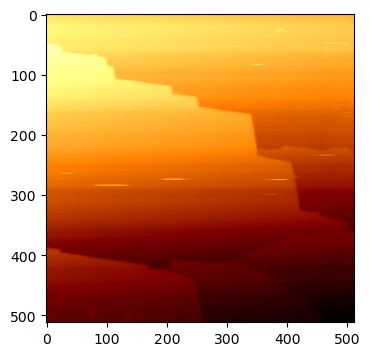

In [30]:
all_scan_data = LoadScans(image_files, channel="height_trace")
all_scan_data.get_data()

# Plot the loaded scan in its raw format
fig, ax = plt.subplots(figsize=(4, 4))
plt.imshow(all_scan_data.image, cmap="afmhot")
plt.show()


In [31]:
all_scan_data.img_dict

{'save-2011.11.30-14.25.48': {'filename': 'save-2011.11.30-14.25.48',
  'img_path': PosixPath('/Users/user/Documents/PhD/AFML/AFML/sample_preproc_data/jpk/save-2011.11.30-14.25.48'),
  'pixel_to_nm_scaling': 9.765625,
  'image_original': array([[7985.22949055, 7985.00060872, 7985.00060872, ..., 7944.71740558,
          7944.94628742, 7945.17516926],
         [7992.78259114, 7993.01147298, 7993.01147298, ..., 7952.72826984,
          7952.72826984, 7952.72826984],
         [7999.64904622, 7999.87792806, 8000.10680989, ..., 7958.45031574,
          7958.45031574, 7958.67919758],
         ...,
         [7759.55200027, 7760.46752761, 7760.69640945, ..., 7674.40795728,
          7674.86572095, 7675.09460279],
         [7758.63647292, 7759.32311843, 7760.00976394, ..., 7677.15453931,
          7677.84118482, 7677.15453931],
         [7759.0942366 , 7759.0942366 , 7759.32311843, ..., 7676.4678938 ,
          7676.4678938 , 7675.78124829]]),
  'image_flattened': None,
  'grain_masks': {}}}

In [32]:
all_scan_data.filename

'save-2011.11.30-14.25.48'

In [33]:
all_scan_data.img_path

PosixPath('/Users/user/Documents/PhD/AFML/AFML/sample_preproc_data/jpk/save-2011.11.30-14.25.48.jpk')

In [34]:
all_scan_data.channel

'height_trace'

In [35]:
all_scan_data.pixel_to_nm_scaling

9.765625

### TopoStats Filtering

In [36]:
# testing some TS filtering

filtered_image = Filters(
    image=all_scan_data.image,
    filename=all_scan_data.filename,
    pixel_to_nm_scaling=all_scan_data.pixel_to_nm_scaling,
    row_alignment_quantile=0.1,
    threshold_method='otsu',
    threshold_std_dev={'below': 10.0, 'above': 1.0},
    threshold_absolute={'below': -1.0, 'above': 1.0},
    gaussian_size=1.0121397464510862,
    gaussian_mode='nearest',
    remove_scars={'run': 'true', 'removal_iterations': 2, 'threshold_low': 0.250, 'threshold_high': 0.666, 'max_scar_width': 4, 'min_scar_length': 16}
)

filtered_image.filter_image()

[Mon, 07 Aug 2023 15:23:42] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : Median flattening without mask
[Mon, 07 Aug 2023 15:23:42] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : Plane tilt removal without mask
[Mon, 07 Aug 2023 15:23:42] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : x-polyfit 1st order: [-0.20070076 90.98939443]
[Mon, 07 Aug 2023 15:23:42] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : y-polyfit 1st order: [2.29871072e-02 3.17021284e+01]
[Mon, 07 Aug 2023 15:23:42] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : Removing x plane tilt
[Mon, 07 Aug 2023 15:23:42] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : removing y plane tilt
[Mon, 07 Aug 2023 15:23:42] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : Remove quadratic bow without mask
[Mon, 07 Aug 2023 15:23:42] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : x polyfit 2nd order: [-2.56962401e-05  2.27379586e-02  8.03950508e+01]
[Mon, 07 Aug 2023 15:23:42] [INFO    ] [topostat

In [37]:
print(f"Available NumPy arrays to plot in filter_image.images dictionary :\n\n{filtered_image.images.keys()}")

Available NumPy arrays to plot in filter_image.images dictionary :

dict_keys(['pixels', 'initial_median_flatten', 'initial_tilt_removal', 'initial_quadratic_removal', 'initial_scar_removal', 'masked_median_flatten', 'masked_tilt_removal', 'masked_quadratic_removal', 'secondary_scar_removal', 'scar_mask', 'mask', 'zero_average_background', 'gaussian_filtered', 'initial_nonlinear_polynomial_removal', 'masked_nonlinear_polynomial_removal'])


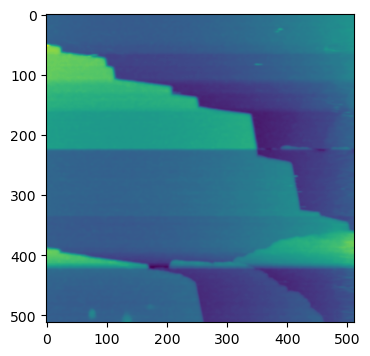

In [38]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.imshow(filtered_image.images["gaussian_filtered"], cmap="viridis")
plt.show()

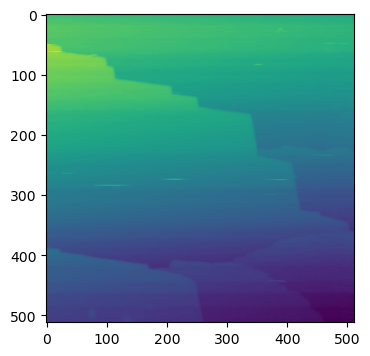

In [39]:
# looking at OG data

fig, ax = plt.subplots(figsize=(4, 4))
plt.imshow(all_scan_data.image, cmap="viridis")
plt.show()

[Mon, 07 Aug 2023 15:24:03] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : Plane tilt removal without mask
[Mon, 07 Aug 2023 15:24:03] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : x-polyfit 1st order: [-1.69404373e-01  7.92221502e+03]
[Mon, 07 Aug 2023 15:24:03] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : y-polyfit 1st order: [-6.07373336e-01  8.02749506e+03]
[Mon, 07 Aug 2023 15:24:03] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : Removing x plane tilt
[Mon, 07 Aug 2023 15:24:04] [INFO    ] [topostats] [save-2011.11.30-14.25.48] : removing y plane tilt


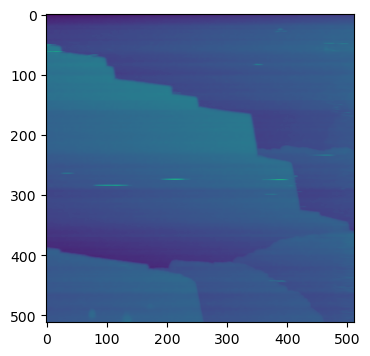

In [41]:
# just utilising individual filters

untilted = Filters.remove_tilt(all_scan_data, image=all_scan_data.image)
#nonlin_pol = Filters.remove_nonlinear_polynomial(all_scan_data, image=all_scan_data.image)
#quadratic = Filters.remove_quadratic(all_scan_data, image=all_scan_data.image)
#average_background = Filters.average_background(all_scan_data, image=all_scan_data.image)
#median_flatten = Filters.median_flatten(all_scan_data, image=all_scan_data.image)

fig, ax = plt.subplots(figsize=(4, 4))
plt.imshow(untilted, cmap="viridis")
plt.show()

# removal of tilt alone seems to provide best flattening i.e. provides clear boundary between two neighbouring terraces

In [67]:
all_scan_data.img_dict


{'save-2011.11.30-14.25.48': {'filename': 'save-2011.11.30-14.25.48',
  'img_path': PosixPath('/Users/user/Documents/PhD/AFML/AFML/sample_preproc_data/jpk/save-2011.11.30-14.25.48'),
  'pixel_to_nm_scaling': 9.765625,
  'image_original': array([[7985.22949055, 7985.00060872, 7985.00060872, ..., 7944.71740558,
          7944.94628742, 7945.17516926],
         [7992.78259114, 7993.01147298, 7993.01147298, ..., 7952.72826984,
          7952.72826984, 7952.72826984],
         [7999.64904622, 7999.87792806, 8000.10680989, ..., 7958.45031574,
          7958.45031574, 7958.67919758],
         ...,
         [7759.55200027, 7760.46752761, 7760.69640945, ..., 7674.40795728,
          7674.86572095, 7675.09460279],
         [7758.63647292, 7759.32311843, 7760.00976394, ..., 7677.15453931,
          7677.84118482, 7677.15453931],
         [7759.0942366 , 7759.0942366 , 7759.32311843, ..., 7676.4678938 ,
          7676.4678938 , 7675.78124829]]),
  'image_flattened': None,
  'grain_masks': {}}}

In [68]:
print(untilted)

[[7985.22949055 7985.17001309 7985.33941746 ... 8030.94423152
  8031.34251773 8031.74080394]
 [7993.38996448 7993.78825069 7993.95765506 ... 8039.56246911
  8039.73187349 8039.90127786]
 [8000.86379289 8001.2620791  8001.66036531 ... 8045.89188835
  8046.06129272 8046.45957893]
 ...
 [8068.70502821 8069.78995993 8070.18824614 ... 8069.78781116
  8070.4149792  8070.81326541]
 [8068.3968742  8069.25292409 8070.10897397 ... 8073.14176653
  8073.99781641 8073.48057527]
 [8069.46201121 8069.63141559 8070.0297018  ... 8073.06249435
  8073.23189873 8072.71465759]]


[[0.04406778 0.04406745 0.04406839 ... 0.04432007 0.04432226 0.04432446]
 [0.04406582 0.04406802 0.04406895 ... 0.04432036 0.0443213  0.04432223]
 [0.04406935 0.04407154 0.04407373 ... 0.04431736 0.0443183  0.04432049]
 ...
 [0.0441625  0.04416844 0.04417062 ... 0.04416843 0.04417186 0.04417404]
 [0.04415945 0.04416414 0.04416882 ... 0.04418542 0.04419011 0.04418728]
 [0.0441599  0.04416083 0.04416301 ... 0.04417961 0.04418054 0.0441777 ]]


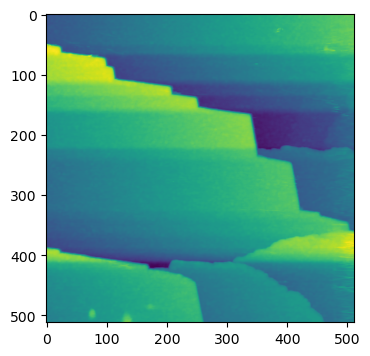

In [69]:
untilted_normalized = normalize(untilted)
print(untilted_normalized)

fig, ax = plt.subplots(figsize=(4, 4))
plt.imshow(untilted_normalized, cmap="viridis")
plt.show()

In [70]:
np.save('sample_untilted_scan.npy', untilted)
np.save('sample_untilted_scan_norm.npy', untilted_normalized)

In [72]:
sample_original = all_scan_data.image
sample_original_norm = normalize(all_scan_data.image)

np.save('sample_original_scan.npy', sample_original)
np.save('sample_original_scan_norm.npy', sample_original_norm)